# Task 2 Linear Regression

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


1. Complete the fit and predict routine in task2.py. (2P)

In [6]:
def make_data(noise=0.2, outlier=1):
    prng = np.random.RandomState(0)
    n = 500
    x0 = np.array([0, 0])[None, :] + noise * prng.randn(n, 2)
    y0 = np.ones(n)
    x1 = np.array([1, 1])[None, :] + noise * prng.randn(n, 2)
    y1 = -1 * np.ones(n)
    x = np.concatenate([x0, x1])
    y = np.concatenate([y0, y1]).astype(np.int32)
    xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size=0.1, shuffle=True, random_state=0
    )
    xplot, yplot = xtrain, ytrain
    outlier = outlier * np.array([1, 1.75])[None, :]
    youtlier = np.array([-1])
    xtrain = np.concatenate([xtrain, outlier])
    ytrain = np.concatenate([ytrain, youtlier])
    return xtrain, xtest, ytrain, ytest, xplot, yplot
    
    
class LinearLeastSquares:
    def fit(self, x, y):

        # Add a column of ones for the bias term
        x = np.c_[np.ones(x.shape[0]), x]

        # @ is matrix multiplication in numpy
        self.params = np.linalg.inv(np.transpose(x) @ x) @ np.transpose(x) @ y
    def predict(self, x):
        # Predict routine
        # Add a column of ones for the bias term
        x = np.c_[np.ones(x.shape[0]), x]

        prediction = x @ self.params
        return prediction
        


The file task2.py contains a synthetic dataset for which one can control the number
of outliers n during generation. Generate datasets for n = 2i
, i = 0, ..., 4 and solve
the following tasks:

2. Visualize the dataset (0.5P)
3. Fit your LLS model to the data, report accuracy on the test set and visualize
the decision boundary of the classifier. (1P)
4. How is the fit affected by the outlier? Give a short explanation. (0.5P)
<ul>
    <li>outlier = 1: The classifier still classifies perfectly</li>
    <li>outlier = 2: The classifier still classifies perfectly</li>
    <li>outlier = 4: The classifier still classifies perfectly</li>
    <li>outlier = 8: The classifier is vissibly affected by the far away outlier. The classification of the data points suffers, because the LLS tries to minimize the sum of the squared differences, which shifts the decision boundary in direction of the outlier.</li>
</ul>
  4.1 
  4.2. 
  4.3. outlier = 4: The classifier still classifies perfectly
  d. outlier = 8: 

Accuracy: 100.0%
Accuracy: 100.0%
Accuracy: 100.0%
Accuracy: 98.0%


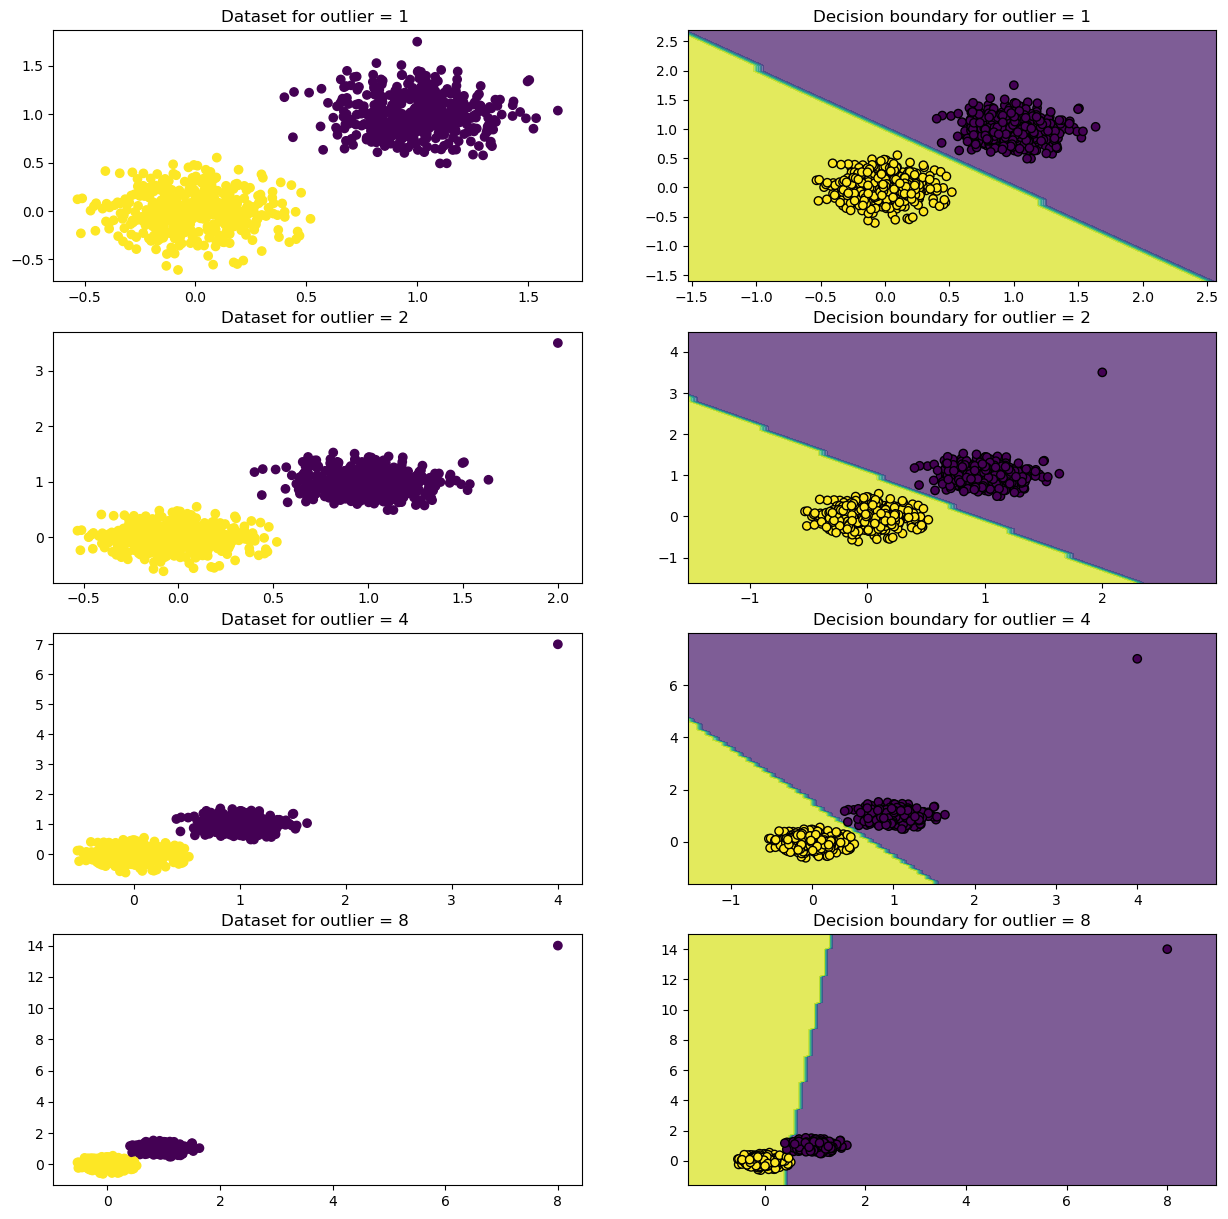

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
lls = LinearLeastSquares()

for exp in range(4):
    xtrain, xtest, ytrain, ytest, xplot, yplot = make_data(outlier=2 ** exp)

    # 2. Visualize the dataset
    axs[exp][0].scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain)
    axs[exp][0].set_title(f"Dataset for outlier = {2 ** exp} ")

    # Train the model
    lls.fit(xtrain, ytrain)

    # 3. Calculate the accuracy of the model on the test set
    ypred = lls.predict(xtest)
    ypred = np.where(ypred >= 0, 1, -1)  # Apply threshold
    accuracy = np.mean(ypred == ytest)
    print(f"Accuracy: {accuracy * 100}%")


    lls.predict(np.array([[10, 10]]))


    # Create a grid of points
    x_min, x_max = xtrain[:, 0].min() - 1, xtrain[:, 0].max() + 1
    y_min, y_max = xtrain[:, 1].min() - 1, xtrain[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    z = np.empty_like(xx)

    # Make the lls prediction for every point in the grid
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            q = np.array([xx[i, j], yy[i, j]]).reshape(1, -1)
            z[i, j] = lls.predict(q)[0]
            # Set a threshold at 0, so that we have a classification with 2 classes
            z[i, j] = np.where(z[i, j] >= 0, 1, -1)
 
    # Plot the decision boundary along with the data points for every k
    axs[exp][1].contourf(xx, yy, z, alpha=0.7)
    axs[exp][1].scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, edgecolor='k')
    axs[exp][1].set_title(f'Decision boundary for outlier = {2 ** exp}')
plt.show()